In [37]:
# Importing necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [38]:
# Loading the dataset
demand_df =  pd.read_csv("demand_data.csv")
demand_df.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


Description of the columns from labs.tumo.world's station project page.

ID: the product ID;
Store ID: specific store ID;
Total Price: price at which the product was sold;
Base Price: the initial price of the product;
Units sold: quantity demanded;

In [39]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


In [40]:
demand_df.describe()

,ID,Store ID,Total Price,Base Price,Units Sold
count,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,206.626751,219.425927,51.674206
std,61386.037861,615.591445,103.308516,110.961712,60.207904
min,1.000000,8023.000000,41.325000,61.275000,1.000000
25%,53111.250000,8562.000000,130.387500,133.237500,20.000000
50%,106226.500000,9371.000000,198.075000,205.912500,35.000000
75%,159452.750000,9731.000000,233.700000,234.412500,62.000000
max,212644.000000,9984.000000,562.162500,562.162500,2876.000000


In [41]:
# Dropping NaN values
demand_df = demand_df.dropna().reset_index(drop=True)

Data Visualization

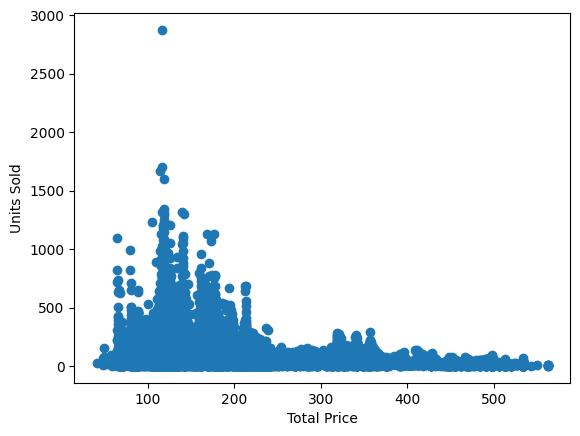

In [42]:
plt.scatter(demand_df['Total Price'], demand_df['Units Sold'])
plt.xlabel('Total Price')
plt.ylabel('Units Sold')
plt.show()

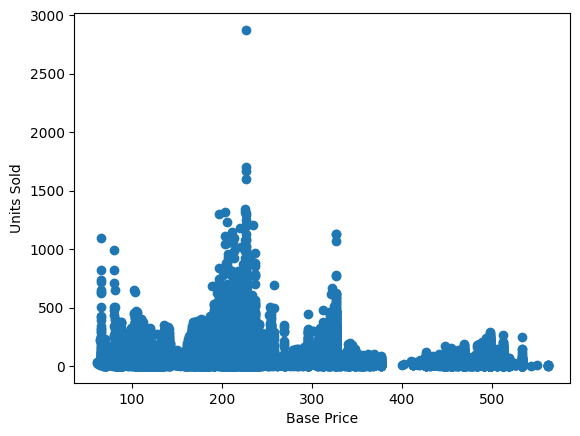

In [43]:
plt.scatter(demand_df['Base Price'], demand_df['Units Sold'])
plt.xlabel('Base Price')
plt.ylabel('Units Sold')
plt.show()

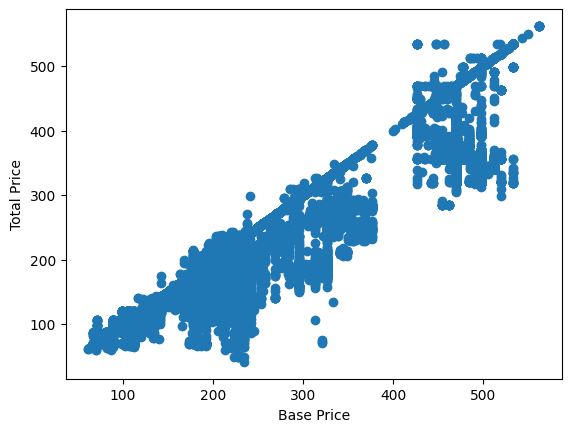

In [44]:
plt.scatter(demand_df['Base Price'], demand_df['Total Price'])
plt.xlabel('Base Price')
plt.ylabel('Total Price')
plt.show()

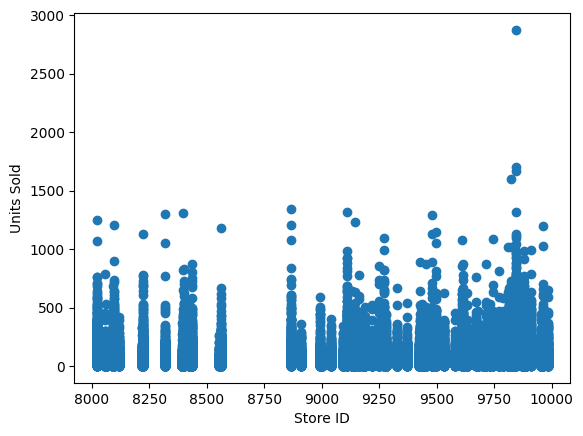

In [45]:
plt.scatter(demand_df['Store ID'], demand_df['Units Sold'])
plt.xlabel('Store ID')
plt.ylabel('Units Sold')
plt.show()

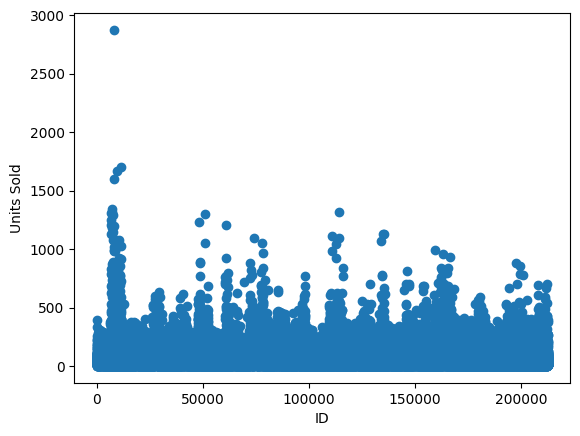

In [46]:
plt.scatter(demand_df['ID'], demand_df['Units Sold'])
plt.xlabel('ID')
plt.ylabel('Units Sold')
plt.show()

From plots and intuitively it's evident, that 'ID' and 'Store ID' have no predictive power, so I will use only 'Base Price' and 'Total Price' as features.

In [47]:
# Getting features and a label
X = demand_df[['Base Price', 'Total Price']]
Y = demand_df['Units Sold']

In [50]:
# Splitting our data into 'train' and 'test' parts
# Random state 42 is used for the result of the code to be reproducible, so it will give
# the same output after every run.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [51]:
# Building our regression model
# The best value for max depth hyperparameter is 11
model_tree = DecisionTreeRegressor(random_state=42, max_depth=11)

In [52]:
# Fitting our model
model_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=11, random_state=42)

Evaluating our model

In [53]:
# By default model's score was 0.3764693086638464, so setting max depth hyperparameter to 11 improved it by around 0.06
model_tree.score(x_test, y_test)

0.43594810058559585

In [54]:
# Checking mean square error
mean_squared_error(y_test, model_tree.predict(x_test))

1845.8316721211518

In [55]:
# Example of making predictions
# The first argument is'Base Price', and the second one is 'Total Price'
model_tree.predict([[1200, 800]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([6.4])

In [56]:
# Another example
model_tree.predict([[1200, 500]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([16.875])

We see, that, when the final price (total price) is lower by 400 than the initial price (Base Price), then around 6 units will be sold, and when it is lower by 700, then 16-17 units will be sold, which seems intuitivly correct.